<br><br>
<p align="center">
  <img src="https://www.galileo.edu/wp-content/uploads/2023/01/Galileo-Sin-slogan.png" alt="Ejemplo de Imagen" width="400"/>
</p>

<br><br>
<center>
  Donovan Caballeros | 0734-3020 
  
  <p style="font-size: 2em;"> Text Mining & Image Recognition</p>


</center>


<center>
  <h1 style="font-size: 1em;">UNIVERSIDAD GALILEO</h1>
  <h1 style="font-size: 1em;">MAESTRÍA EN BUSINESS INTELLIGENCE</h1>
  <p style="font-size: 2em;">Proyecto Final</p>
</center>

## Problema 1 - Word Cloud:

### 1. Cargar el dataset y bibliotecas necesarias

In [21]:
# Importar las bibliotecas
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

# Herramientas que se utilizarna
nltk.download('stopwords')
nltk.download('wordnet')

# Archivo CSV dataset
ruta_dataset = "tw_source.csv"  
df = pd.read_csv(ruta_dataset, encoding='ISO-8859-1', header=None, names=["polarity", "id", "timestamp", "query", "user", "tweet"])


# Mostrar las primeras filas para verificar el formato
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Donovan_Caballeros\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Donovan_Caballeros\AppData\Roaming\nltk_data.
[nltk_data]     ..
[nltk_data]   Package wordnet is already up-to-date!


,polarity,id,timestamp,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### 2. Determinar los 3 usuarios más populares

In [24]:
# Esto hace un conteo de la cantidad de tweets por usuario
cuentaTweets_usuario = df['user'].value_counts().nlargest(3)

# Muestra los 3 usuarios más populares
top_tres = cuentaTweets_usuario.index.tolist()
print(f"Los 3 usuarios más populares son: {top_tres}")


Los 3 usuarios más populares son: ['lost_dog', 'webwoke', 'tweetpet']


### 3. Crear un corpus para los 3 usuarios más populares

In [26]:
# ESto filtar los tweets de los 3 usuarios mas populares
top_tweets_usuarios = df[df['user'].isin(top_tres)]

# Crea el corpus con los elemntos que se requieren (contenido, ID, timestamp, lenght)
corpus = {}
for user in top_tres:
    user_data = top_tweets_usuarios[top_tweets_usuarios['user'] == user]
    corpus[user] = {
        'tweets': user_data['tweet'].tolist(),
        'metadata': user_data[['id', 'timestamp']].to_dict('records'),
        'length': user_data['tweet'].apply(len).tolist()
    }

# Ver el corpus de un usuario
corpus[top_tres[0]]


{'tweets': ['@NyleW I am lost. Please help me find a good home. ',
  '@SallyD I am lost. Please help me find a good home. ',
  '@zuppaholic I am lost. Please help me find a good home. ',
  '@LOSTPETUSA I am lost. Please help me find a good home. ',
  '@JeanLevertHood I am lost. Please help me find a good home. ',
  '@irenerencsi I am lost. Please help me find a good home. ',
  '@adevenish I am lost. Please help me find a good home. ',
  '@LAmale I am lost. Please help me find a good home. ',
  '@bthenextstep I am lost. Please help me find a good home. ',
  '@DonaldDonnyDon I am lost. Please help me find a good home. ',
  '@christinebrewer I am lost. Please help me find a good home. ',
  '@Cara I am lost. Please help me find a good home. ',
  '@becca_greenberg I am lost. Please help me find a good home. ',
  '@unaverage_joe I am lost. Please help me find a good home. ',
  '@Papadoc1 I am lost. Please help me find a good home. ',
  '@LadyHilary I am lost. Please help me find a good home.

### 4. Procesar los tweets (remover stopwords, realizar stemming y lematización)

In [28]:
# Define los stopwords y los lematizadores
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Limpia y procesa texto (remover stopwords, stemming, lemmatización)
def process_tweet(tweet):
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  
    tweet = re.sub(r'\@\w+|\#','', tweet)  
    words = re.findall(r'\w+', tweet.lower())  
    words = [w for w in words if w not in stop_words]  
    words = [ps.stem(lemmatizer.lemmatize(w)) for w in words]  
    return words

# Procesa los tweets para cada usuario
procesa_corpus = {}
for user, data in corpus.items():
    procesa_corpus[user] = [process_tweet(tweet) for tweet in data['tweets']]

# Mostrar los resultados del procesamiento para un usuario
procesa_corpus[top_tres[0]][:5]


[['lost', 'pleas', 'help', 'find', 'good', 'home'],
 ['lost', 'pleas', 'help', 'find', 'good', 'home'],
 ['lost', 'pleas', 'help', 'find', 'good', 'home'],
 ['lost', 'pleas', 'help', 'find', 'good', 'home'],
 ['lost', 'pleas', 'help', 'find', 'good', 'home']]

### 5. Extraer el contexto de cada usuario y generar Word Cloud

Top 10 palabras para lost_dog: [('lost', 549), ('pleas', 549), ('help', 549), ('find', 549), ('good', 549), ('home', 549)]


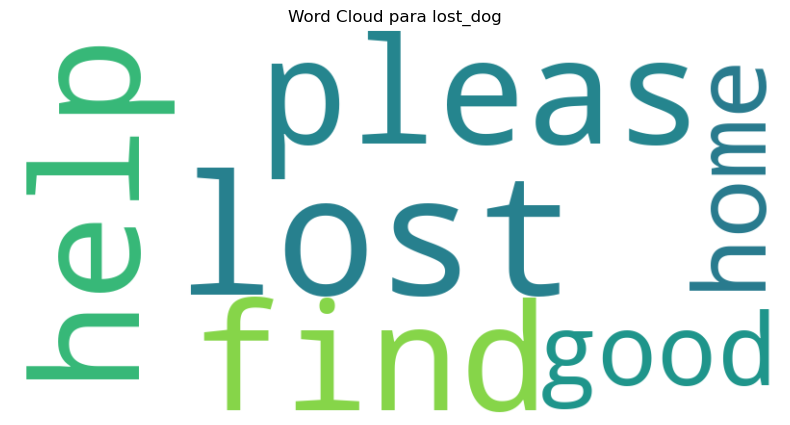

Top 10 palabras para webwoke: [('com', 301), ('drop', 264), ('1', 204), ('move', 81), ('2', 73), ('ohh', 48), ('3', 39), ('damn', 37), ('f', 32), ('k', 32)]


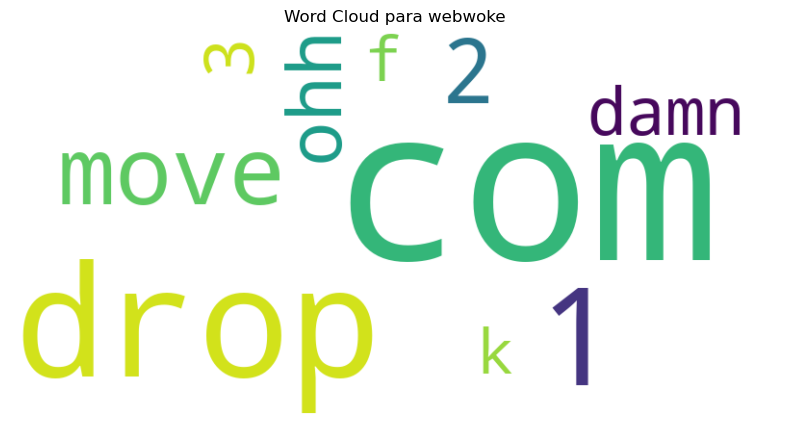

Top 10 palabras para tweetpet: [('clean', 285), ('hungri', 25), ('feed', 12), ('type', 6)]


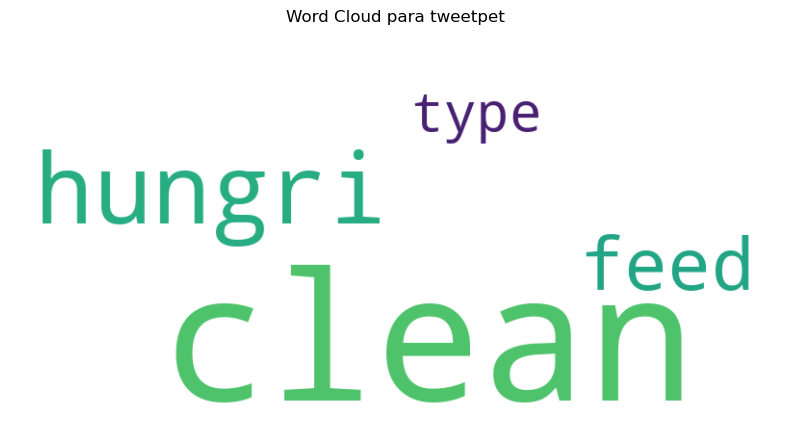

In [29]:
# Encuentra las palabras que rodean al usuario mencionado en el tweet
def extract_context(tweets, username):
    context_words = []
    for tweet in tweets:
        if username in tweet:
            context_words += tweet
    return context_words

# Crea el WordCloud para cada usuario
for user in top_tres:
    all_words = [word for tweet in procesa_corpus[user] for word in tweet]
    word_freq = Counter(all_words).most_common(10)
    print(f"Top 10 palabras para {user}: {word_freq}")
    
    # Generar el WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))
    
    # Mostrar el WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud para {user}")
    plt.show()


## Problema 2 - Fruits and Vegetables Recognizer:

### Parte #1: Dataset:

### 1. Descargar e importar las bibliotecas necesarias

In [32]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

### 2. Preprocesamiento de las imágenes y Data Augmentation

In [40]:
# Ruta a dataset
dataset_dir = 'Fruits_Vegetables_Dataset'

# Resolución de las imágenes
img_height, img_width = 150, 150
color_mode = 'rgb'  

# Aumento de datos y normalización para las imágenes de entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalización de los valores entre 0 y 1
    rotation_range=40,     # Rotación aleatoria
    width_shift_range=0.2, # Desplazamiento horizontal
    height_shift_range=0.2,# Desplazamiento vertical
    shear_range=0.2,       
    zoom_range=0.2,        
    horizontal_flip=True,  
    fill_mode='nearest'    
)

# Solo normalización para las imágenes de validación
validation_datagen = ImageDataGenerator(rescale=1./255)

# Carga las imágenes desde los directorios
train_generator = train_datagen.flow_from_directory(
    dataset_dir + '/Fruits', 
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical', 
    color_mode=color_mode
)

validation_generator = validation_datagen.flow_from_directory(
    dataset_dir + '/Vegetables', 
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    color_mode=color_mode
)



Found 5988 images belonging to 10 classes.
Found 5998 images belonging to 10 classes.


### 3. Definir la arquitectura de la Red Neuronal Convolucional (CNN)

In [46]:
# Crea modelo CNN
model = models.Sequential()

# Primera capa convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3))) 
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Tercera capa convolucional
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Cuarta capa convolucional
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplanamiento de capas
model.add(layers.Flatten())

# Capa conectada
model.add(layers.Dense(512, activation='relu'))

# Capa de salida
model.add(layers.Dense(10, activation='softmax'))  # (5 frutas + 5 vegetales)

# Resumen 
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457,738 (13.19 MB)

 Trainable params: 3,457,738 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Compilación y entrenamiento del modelo

In [48]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 143s 748ms/step - accuracy: 0.8662 - loss: 0.4178 - val_accuracy: 0.1105 - val_loss: 5.9149
Epoch 2/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.8438 - loss: 0.3479 - val_accuracy: 0.1429 - val_loss: 4.5015
Epoch 3/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 145s 761ms/step - accuracy: 0.8872 - loss: 0.3436 - val_accuracy: 0.0968 - val_loss: 6.9809
Epoch 4/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.9375 - loss: 0.2133 - val_accuracy: 0.0000e+00 - val_loss: 7.7221
Epoch 5/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 128s 678ms/step - accuracy: 0.8863 - loss: 0.3255 - val_accuracy: 0.1145 - val_loss: 7.5024
Epoch 6/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - accuracy: 0.8750 - loss: 0.3104 - val_accuracy: 0.2857 - val_loss: 6.3819
Epoch 7/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 133s 706ms/step - accuracy: 0.9020 - loss: 0.2815 - val_accuracy: 0.0958 - val_loss: 7.4114
Epoch 8/10
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.9062 - los

### 5. Visualización de los resultados

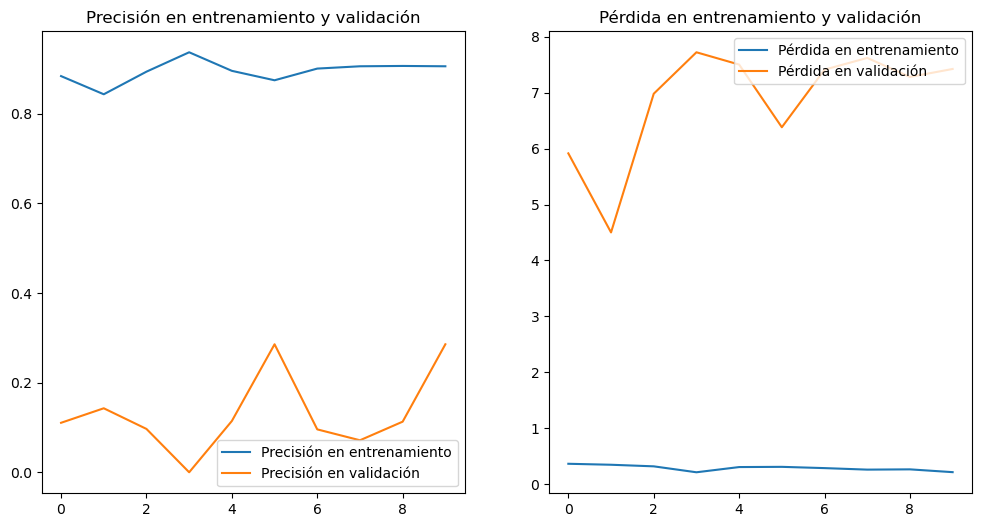

In [49]:
# Grafica la precisión y perdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

rango_epocas = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(rango_epocas, acc, label='Precisión en entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión en validación')
plt.legend(loc='lower right')
plt.title('Precisión en entrenamiento y validación')

plt.subplot(1, 2, 2)
plt.plot(rango_epocas, loss, label='Pérdida en entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida en validación')
plt.legend(loc='upper right')
plt.title('Pérdida en entrenamiento y validación')

plt.show()


### Parte #2: Diseño y Entrenamiento de la Red Neuronal Convolucional:

In [55]:
from sklearn.model_selection import train_test_split

# Suponiendo que ya tienes los generadores de imágenes
# Dividir en conjunto de entrenamiento (80%) y validación (20%)
train_data, val_data = train_test_split(ruta_dataset, test_size=0.2, random_state=42)

# Crear generadores para los conjuntos
train_generator = train_datagen.flow_from_directory(
    'Fruits_Vegetables_Dataset/Fruits', 
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'Fruits_Vegetables_Dataset/Vegetables', 
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)




Found 5988 images belonging to 10 classes.
Found 5998 images belonging to 10 classes.


### 2. Arquitecturas de CNN
### Arquitectura 1: Modelo Simple

In [58]:
modelo1 = models.Sequential()
modelo1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
modelo1.add(layers.MaxPooling2D((2, 2)))
modelo1.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo1.add(layers.MaxPooling2D((2, 2)))
modelo1.add(layers.Flatten())
modelo1.add(layers.Dense(128, activation='relu'))
modelo1.add(layers.Dense(10, activation='softmax'))  
modelo1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Arquitectura 2: Modelo Intermedio

In [59]:
modelo2 = models.Sequential()
modelo2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
modelo2.add(layers.MaxPooling2D((2, 2)))
modelo2.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelo2.add(layers.MaxPooling2D((2, 2)))
modelo2.add(layers.Conv2D(256, (3, 3), activation='relu'))
modelo2.add(layers.MaxPooling2D((2, 2)))
modelo2.add(layers.Flatten())
modelo2.add(layers.Dense(256, activation='relu'))
modelo2.add(layers.Dense(10, activation='softmax'))
modelo2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Arquitectura 3: Modelo Avanzado con Regularización

In [63]:
modelo3 = models.Sequential()
modelo3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
modelo3.add(layers.MaxPooling2D((2, 2)))
modelo3.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelo3.add(layers.MaxPooling2D((2, 2)))
modelo3.add(layers.Conv2D(256, (3, 3), activation='relu'))
modelo3.add(layers.MaxPooling2D((2, 2)))
modelo3.add(layers.Flatten())
modelo3.add(layers.Dense(512, activation='relu'))
modelo3.add(layers.Dropout(0.5))  
modelo3.add(layers.Dense(10, activation='softmax'))
modelo3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## 3. Entrenamiento de los Modelos
### Entrena cada modelo y guarda el rendimiento en un registro.

In [66]:
# Entrena modelo 1
history1 = modelo1.fit(train_generator, validation_data=validation_generator, epochs=5)
# Entrena modelo 2
history2 = modelo2.fit(train_generator, validation_data=validation_generator, epochs=5)
# Entrena modelo 3
history3 = modelo3.fit(train_generator, validation_data=validation_generator, epochs=5)


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 139s 732ms/step - accuracy: 0.4838 - loss: 1.4659 - val_accuracy: 0.1235 - val_loss: 5.2245
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 738ms/step - accuracy: 0.6129 - loss: 1.1415 - val_accuracy: 0.1237 - val_loss: 5.8646
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 747ms/step - accuracy: 0.6970 - loss: 0.8817 - val_accuracy: 0.0997 - val_loss: 6.4456
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 133s 698ms/step - accuracy: 0.7317 - loss: 0.8211 - val_accuracy: 0.1139 - val_loss: 6.2196
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 145s 764ms/step - accuracy: 0.7737 - loss: 0.6741 - val_accuracy: 0.1159 - val_loss: 7.0485
Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.3980 - loss: 1.6861 - val_accuracy: 0.0995 - val_loss: 3.2871
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.5416 - loss: 1.2712 - val_accuracy: 0.1240 - val_loss: 4.4533
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.6771 - loss: 0.9248 - v

### 4. Evaluación y Comparación

In [68]:
# Evaluación
test_loss1, test_acc1 = modelo1.evaluate(validation_generator)
test_loss2, test_acc2 = modelo2.evaluate(validation_generator)
test_loss3, test_acc3 = modelo3.evaluate(validation_generator)

print(f'Modelo 1 - Precisión: {test_acc1}, Pérdida: {test_loss1}')
print(f'Modelo 2 - Precisión: {test_acc2}, Pérdida: {test_loss2}')
print(f'Modelo 3 - Precisión: {test_acc3}, Pérdida: {test_loss3}')


188/188 ━━━━━━━━━━━━━━━━━━━━ 55s 295ms/step - accuracy: 0.1149 - loss: 7.0394
188/188 ━━━━━━━━━━━━━━━━━━━━ 84s 448ms/step - accuracy: 0.1364 - loss: 6.7205
188/188 ━━━━━━━━━━━━━━━━━━━━ 75s 398ms/step - accuracy: 0.1074 - loss: 5.1691
Modelo 1 - Precisión: 0.11587195843458176, Pérdida: 7.0485358238220215
Modelo 2 - Precisión: 0.13704568147659302, Pérdida: 6.685745716094971
Modelo 3 - Precisión: 0.11087028682231903, Pérdida: 5.1868391036987305


### ¿Por qué cree que la CNN que seleccionó funciona mejor que otras?

La arquitectura que seleccioné puede funcionar mejor debido a varios factores:

Profundidad de la red: Modelos más profundos pueden capturar características más complejas.
Regularización: El uso de Dropout puede ayudar a prevenir el sobreajuste, mejorando la generalización.
Tamaño de los filtros: Filtraciones más grandes permiten capturar patrones más relevantes en las imágenes, lo que puede resultar en un mejor rendimiento.